In [304]:
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [305]:
img_raw = cv2.imread('../data/179.jpg')

In [306]:
height, width, channels = img_raw.shape 

In [307]:
width, height

(1000, 667)

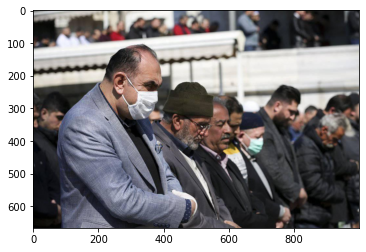

In [308]:
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB) 
plt.imshow(img)

In [309]:
df = pd.read_csv('../data/179.txt', delimiter=' ', header=None)
df.columns = ['label', 'x_center', 'y_center','width_rect', 'height_rect']

##### Formula: (x_center + width rectangle/2) * width of images

In [313]:
df['x_start'] = df.apply(lambda row: round((row.x_center - row.width_rect/2) *width), axis=1)
df['y_start'] = df.apply(lambda row:  round((row.y_center - row.height_rect/2) *height), axis=1)
df['x_end'] = df.apply(lambda row: round((row.x_center + row.width_rect/2) *width), axis=1)
df['y_end'] = df.apply(lambda row:  round((row.y_center + row.height_rect/2) *height), axis=1)

In [314]:
for index, raw in df.iterrows():
    img_rect = cv2.rectangle(img_raw, (int(raw['x_start']), int(raw['y_start'])), (int(raw['x_end']), int(raw['y_end'])), (255,0,0), 2)

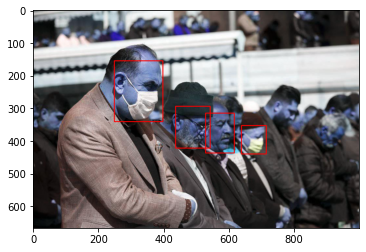

In [315]:
plt.imshow(img_rect)